<a href="https://colab.research.google.com/github/PNWDrew/reinforcement_learning/blob/master/latex_Ch_3_MDP_Explanations_Gridworld_Value_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gridworld Example

##Problem Setup

*   The gridworld is a great example of decision making since it closely resembles the movement of real world robots and is similar to our beloved vintage 2D games from the 90's.
*   At the same time, the value of each state can be easily analysed in the grid and the policy is apparent from the gradient of the value function.

*    Lets take the simple 5 by 5 grid.
*    The book's example is as follows:


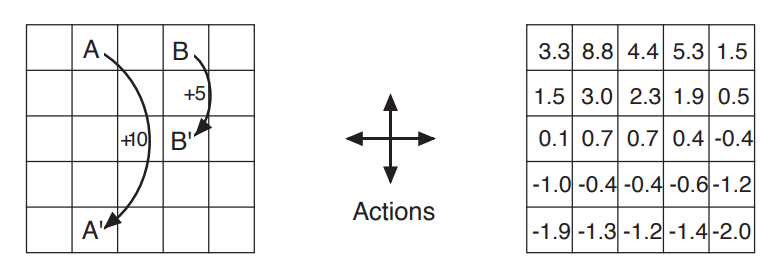

*   The agent is given zero reward if it moves inside the grid.
*   If it tries to go off the grid, its position doesn't change, but a $-1$ reward is returned.
*   `A` and `B` are special positions, which provide rewards of $+10$ and $+5$ respectively, and teleport the agent to `A'` and `B'`.


##Where are the highest and lowest state values?

* Now, looking at the state values of each cell position on the right, it makes sense that position A and B are of the highest value.
    * Everytime the agent goes to `A` or `B`, the rewards are the largest, so `A` and `B` have the largest values.
    * The corner cells (far from `A` and `B`) tend to have lower values, because trying to go offgrid returns negative rewards. Hence, the lower left and right state values are -1.9 and -2.0.
    * The general pattern is that, the closer the cells are to A and B, the higher their values.

## Using Bellman Backup equation to calculate the state values

* The Bellman Equation:  
>$
v_{\pi}(s) = \mathbb{E}\Big[ \sum_{k=0}^\infty \gamma ^ k R_{t+k+1} \enspace | \enspace S_t = s \Big]
$

  which breaks down to:  
>$
v_{\pi}(s) = \sum\limits_{a} \pi (a | s) \sum\limits_{s'} \sum\limits_{r} p(s', r | s, a) \Big[ r + \gamma v_{\pi}(s') \Big]
$  
>$
v_{\pi}(s) = \sum\limits_{a} \pi (a | s) \sum\limits_{s', r}  p(s', r | s, a) \Big[ r + \gamma v_{\pi}(s') \Big]
$

That's a lot to unpack, let's break it down:

*   $v_\pi(s)$ is the value function of the state $s$.  
    So, in the recycling robot example, $v_\pi(h)$ represents the value of the `high` state.

*   $\sum\limits_{a}$ is calculating the inside argument for every action,  
    example, `up`, `down`, `left` and `right` in the gridworld.

*   $\pi(a|s)$ is the policy function, which takes the state as input, and returns a probability distribution for all the actions.  
    Therefore, in the gridworld example, if the agent is moving randomly,  
    $\pi(up) = \pi(down) = \pi(left) = \pi(right) = 1/4$  
    since there are four outcomes, so they are equiprobable.

*   $\sum\limits_{s'}$ and  $\sum\limits_{r}$ are looping through all future states and rewards.  
    Example: At any gridworld position, one can move in four directions.  
    If $s = (1,1)$ (1 down and 1 right from the top right corner)  
    then $s'$ consists of $(1, 0), (1, 2), (0, 1), (2,1)$.  
    And the rewards are zero for all movements in this case .

*   $p(s', r | s, a)$ is the trasition probability, which tells us what moves are allowed given an action and future state.  
    Example:  
    In the gridworld,  
    * $p(s' = (0, 0), r = -1 | s = (0, 0), a = up) = 1$ because going offgrid doesn't change position and rewards -1,  
    * $p(s' = (0, 0), r = 0 | s = (0, 1), a = down) = 1$ because the agent can move down and get zero reward,    
    * $p(s' = (0, 0), r = 0 | s = (1, 1), a = down) = 0$ because the agent can't move diagonally.

*   $\gamma$ is the discount factor, which determines how much future reward we are motivated by.  
    * $\gamma = 1$ means that all future rewards are equally important as the next reward.
    * $\gamma = 0$ means only the immediate next reward counts and no consideration of future rewards.

*   $v_\pi(s')$ is the value of the state the agent wants to move to. 


The gist of it is:  
* All possible actions are explored.  
* All future states, their rewards and state values are taken into account.  
* The innermost reward plus next state value term is weighed by the policy probability, $\pi$, and the transitional probability, $p$.  
* And voila, you have the current state value.

## Gridworld state value - manual calculation example

Let's take the example from the book again:

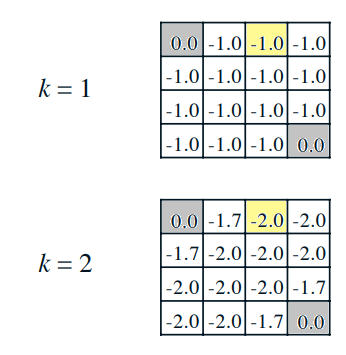

*   The above is an undiscounted gridworld of size 4 by 4.
*   There are two terminal states, which are states in which the episode ends, when the agent reaches it.
    *   The terminal states for the above grid are the grey cells at the top left and bottom right, and are assigned to 0 value, and the value of these states are not iterated because these are terminal states, which are the anchor point for the other values on the board.
*   The rest of the non-terminal state values have been iterated twice, since $k = 2$.
*   The reward is zero for any movement within the grid, and also for trying to go off grid, in which case the agent doesn't move at all.

Let's prove the calculation that the state value of the yellow cell is $-2.0$ in the bottom grid using the values from the top grid.


Using the Bellman Backup Equation:

>$
v_{\pi}(s) = \sum\limits_{a} \pi (a | s) \sum\limits_{s', r}  p(s', r | s, a) \Big[ r + \gamma v_{\pi}(s') \Big]
$

There are 4 actions, so the outer sum will consist of four terms.

>$$
\begin{array}{r}
v_{\pi}(s) = \qquad \pi (up) \sum\limits_{s', r}  p(s', r | s, up) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (down) \sum\limits_{s', r}  p(s', r | s, down) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (left) \sum\limits_{s', r}  p(s', r | s, left) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (right) \sum\limits_{s', r}  p(s', r | s, right) \Big[ r + \gamma v_{\pi}(s') \Big]
\end{array}
$$

Each of the inner sums have only one possible term, since in the gridworld, any one action doesn't give rise to multiple outcomes (like in the recyling robot) and so, the state trasitions are deterministic. So,  
>$$
\begin{array}{r}
v_{\pi}(s) = \qquad \pi (up) \times p(s', r | s, up) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (down) \times  p(s', r | s, down) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (left) \times  p(s', r | s, left) \Big[ r + \gamma v_{\pi}(s') \Big] \\\
+ \pi (right) \times  p(s', r | s, right) \Big[ r + \gamma v_{\pi}(s') \Big]
\end{array}
$$ 


Now,  
* All the trasition probabilities are 1,  
* all rewards are -1.
* The policy function probability value is $1/4$ since random policy is assumed.  
* The $v_\pi(s')$ of the next states are to be read from the top grid, which are all $-1$ in this case.
   * For the `up` action, there is no next state outside the grid, so the current state value of the yellow cell is used.
* $\gamma = 1$ since undiscounted.

Putting it all together,
>$$
\begin{array}{r}
v_{\pi}(s) = \qquad 1/4 \times 1 \times [ -1 - 1 ] \\\
+ 1/4 \times 1 \times [ -1 - 1 ] \\\
+ 1/4 \times 1 \times [ -1 - 1 ] \\\
+ 1/4 \times 1 \times [ -1 - 1 ] \\\
\end{array}
$$  
$$
\begin{array}{r}
v_{\pi}(s) = -2
\end{array}
$$  

which matches the yellow cell from the bottom grid.

#Recycling Robot Example

## Problem setup

*   The robot in question goes around a floor and picks up trash.
*   The states of the robot are defined as `high` and `low`, as in, charge in the battery is high and low.
*   The actions that it can take are
    * `search` for new trash, which will obviously consume charge.
    * `wait` for new trash to be created on the floor, and this requires no charge, so states won't change.
    * `recharge` when the charge is low, so that state changes from low to high.
*   The rewards can be 
      * a small reward for searching, 
      * an even smaller reward for waiting, 
      * no reward for recharging, 
      * but a large negative reward for running out of charge and having to be rescued.



## Rewards, state trasition probabilites and state trasition diagram

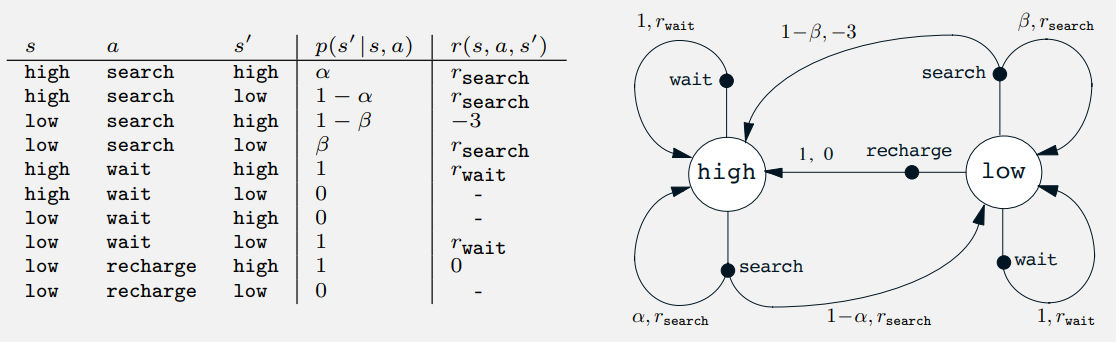

Look at the state trasition diagram on the right:

*   `high` and `low` states are a decent model for the robot since optimizing energy is important.
*   If the charge is `high` and the robot performs `search`:
      * it can either remain at a `high` charge
      * or the charge can deplete to `low`.
*   In either case, the robot receives a small encouraging reward of $r_{search}$.
*   The state transition probabilities are $\alpha$ and $1-\alpha$, since taking the `search` action from the `high` state can keep you at `high` or send to `low`.
Mathematically,
>$
p(s'=high, r = r_{search} \enspace | \enspace s=high, a=search) = \alpha
$  
>$
p(s'=low, r = r_{search} \enspace | \enspace s=high, a=search) = 1 - \alpha
$

*   Alternately, if the robot peforms `wait`, then the charge will remain `high` and a small reward of $r_{wait}$ is received. 
*   The state trasition probability is 1, since waiting can't lead to a `low` charge.  
>$
p(s'=high, r = r_{wait} \enspace | \enspace s=high, a=wait) = 1
$

    So,  
>$
p(s'=low, r = r_{wait} \enspace | \enspace s=high, a=wait) = 0
$

*   An interesting case is what happens when the robot is at `low` and it still performs `search`.
    * It can obviously have enough charge to survive the journey, Hence,
>$
p(s'=low, r = r_{search} | \enspace s=low, a=search) = \beta
$
    * But what is not apparent from the state diagram is that, if the charge is not enough for the robot to reach the recharging station, then it must be rescued from its dead state. The probability of being rescued is therefore:
>$
p(s'=high, r = -3 \enspace | \enspace s=low, a=search) = 1-\beta
$
    * This explains why the charge went from `low` to `high` suddenly.


* By similar analysis, the transition probabilities of recharging and waiting in a `low` state are:  
>$
p(s'=high, r = 0 \enspace | \enspace s=low, a=recharge) = 1\\\
p(s'=low, r = r_{wait} \enspace | \enspace s=low, a=wait) = 1
$

##Applying Bellman Equation to the recycling robot

*This is already in the book and is simply included for completion*

*   Applying the Bellman equation to a stochastic case like this is helpful in distinguishiong it from the gridworld.
* Since there are only two states and three actions, the Bellman Backup equation will not be too long.

>$
v_{\pi}(s) = \sum\limits_{a} \pi (a | s) \sum\limits_{s', r}  p(s', r | s, a) \Big[ r + \gamma v_{\pi}(s') \Big]
$  



For the `high` state, if the policy is to `search`, then the state can either return to `high` or transition to `low`, so two terms for the inner sum:

>$$
\begin{array}{r}
v_{search}(h) = \qquad p(high, r_{search} | high, search) \Big[ r(high,search,high) + \gamma v_{search}(high) \Big] \\\
 + p(low, r_{search} | high, search) \Big[ r(high,search,low) + \gamma v_{search}(high) \Big] \\\
\end{array}
$$ 
>$$
\begin{array}{r}
v_{search}(h) = \qquad \alpha \Big[ r_{search} + \gamma v_{search}(h) \Big] \\\
+ (1 - \alpha) \Big[ r_{search} + \gamma v_{search}(h) \Big] \\\
\end{array}
$$ 

* To solve the above and find $v_{search}(h)$,
we must choose values of the probability, $\alpha$, and reward, $r_{search}$, plug it in and solve for the value.  
* In a similar fashion, the other 3 cases values can be calculated:
  *  $v_{wait}(h)$
  *  $v_{search}(l)$
  *  $v_{wait}(l)$

# Picking the optimal action

*   In order to maximize reward, an optimized set of actions need to be chosen.

* The Bellman equation can be tweaked to pick an optimal action, known as the Bellman optimality equation:

>$$
v_*(s) = \max_{a} q_{\pi_*}(s, a)\\\
v_*(s) = \max_{a} \sum\limits_{s', r} p(s', r | s, a) [r + \gamma v_*(s')]
$$
 
A similar equation for state-action value function:

>$$
q_*(s, a) =  \sum\limits_{s', r} p(s', r | s, a) [r + \gamma \max_{a'} q_*(s', a')]
$$

A quote from the book about the elegant value function:
>  The beauty of $v_*$ is that if one uses it to evaluate the short-term consequences of actions—specifically, the one-step consequences—then a greedy policy is actually optimal in the long-term sense in which we are interested because $v_*$ already takes into account the reward consequences of all possible future behavior. By means of $v_*$, the optimal expected long-term return is turned into a quantity that is locally and immediately available for each state. Hence, a one-step-ahead search yields the long-term optimal actions.

> Having $q_*$ makes choosing optimal actions even easier. With $q_*$ , the agent does not even have to do a one-step-ahead search: for any state s, it can simply find any action that maximizes $q_*(s, a)$. The action-value function effectively caches the results of all one-step-ahead searches. It provides the optimal expected long-term return as a value that is locally and immediately available for each state–action pair. Hence, at the cost of representing a function of state–action pairs, instead of just of states, the optimal actionvalue function allows optimal actions to be selected without having to know anything about possible successor states and their values, that is, without having to know anything about the environment’s dynamics.